/work/home/xinyu/soft/XinYuEnv/lib/python3.8/site-packages/ase/calculators/emt.py:218: RuntimeWarning: invalid value encountered in true_divide
  f = ((y1 * p2['kappa'] + y2 * p1['kappa']) / beta +
/work/home/xinyu/soft/XinYuEnv/lib/python3.8/site-packages/ase/calculators/emt.py:235: RuntimeWarning: invalid value encountered in true_divide
  f = ((y1 * p2['eta2'] + y2 * p1['eta2']) +


[[3. 3. 3.]
 [3. 3. 8.]]


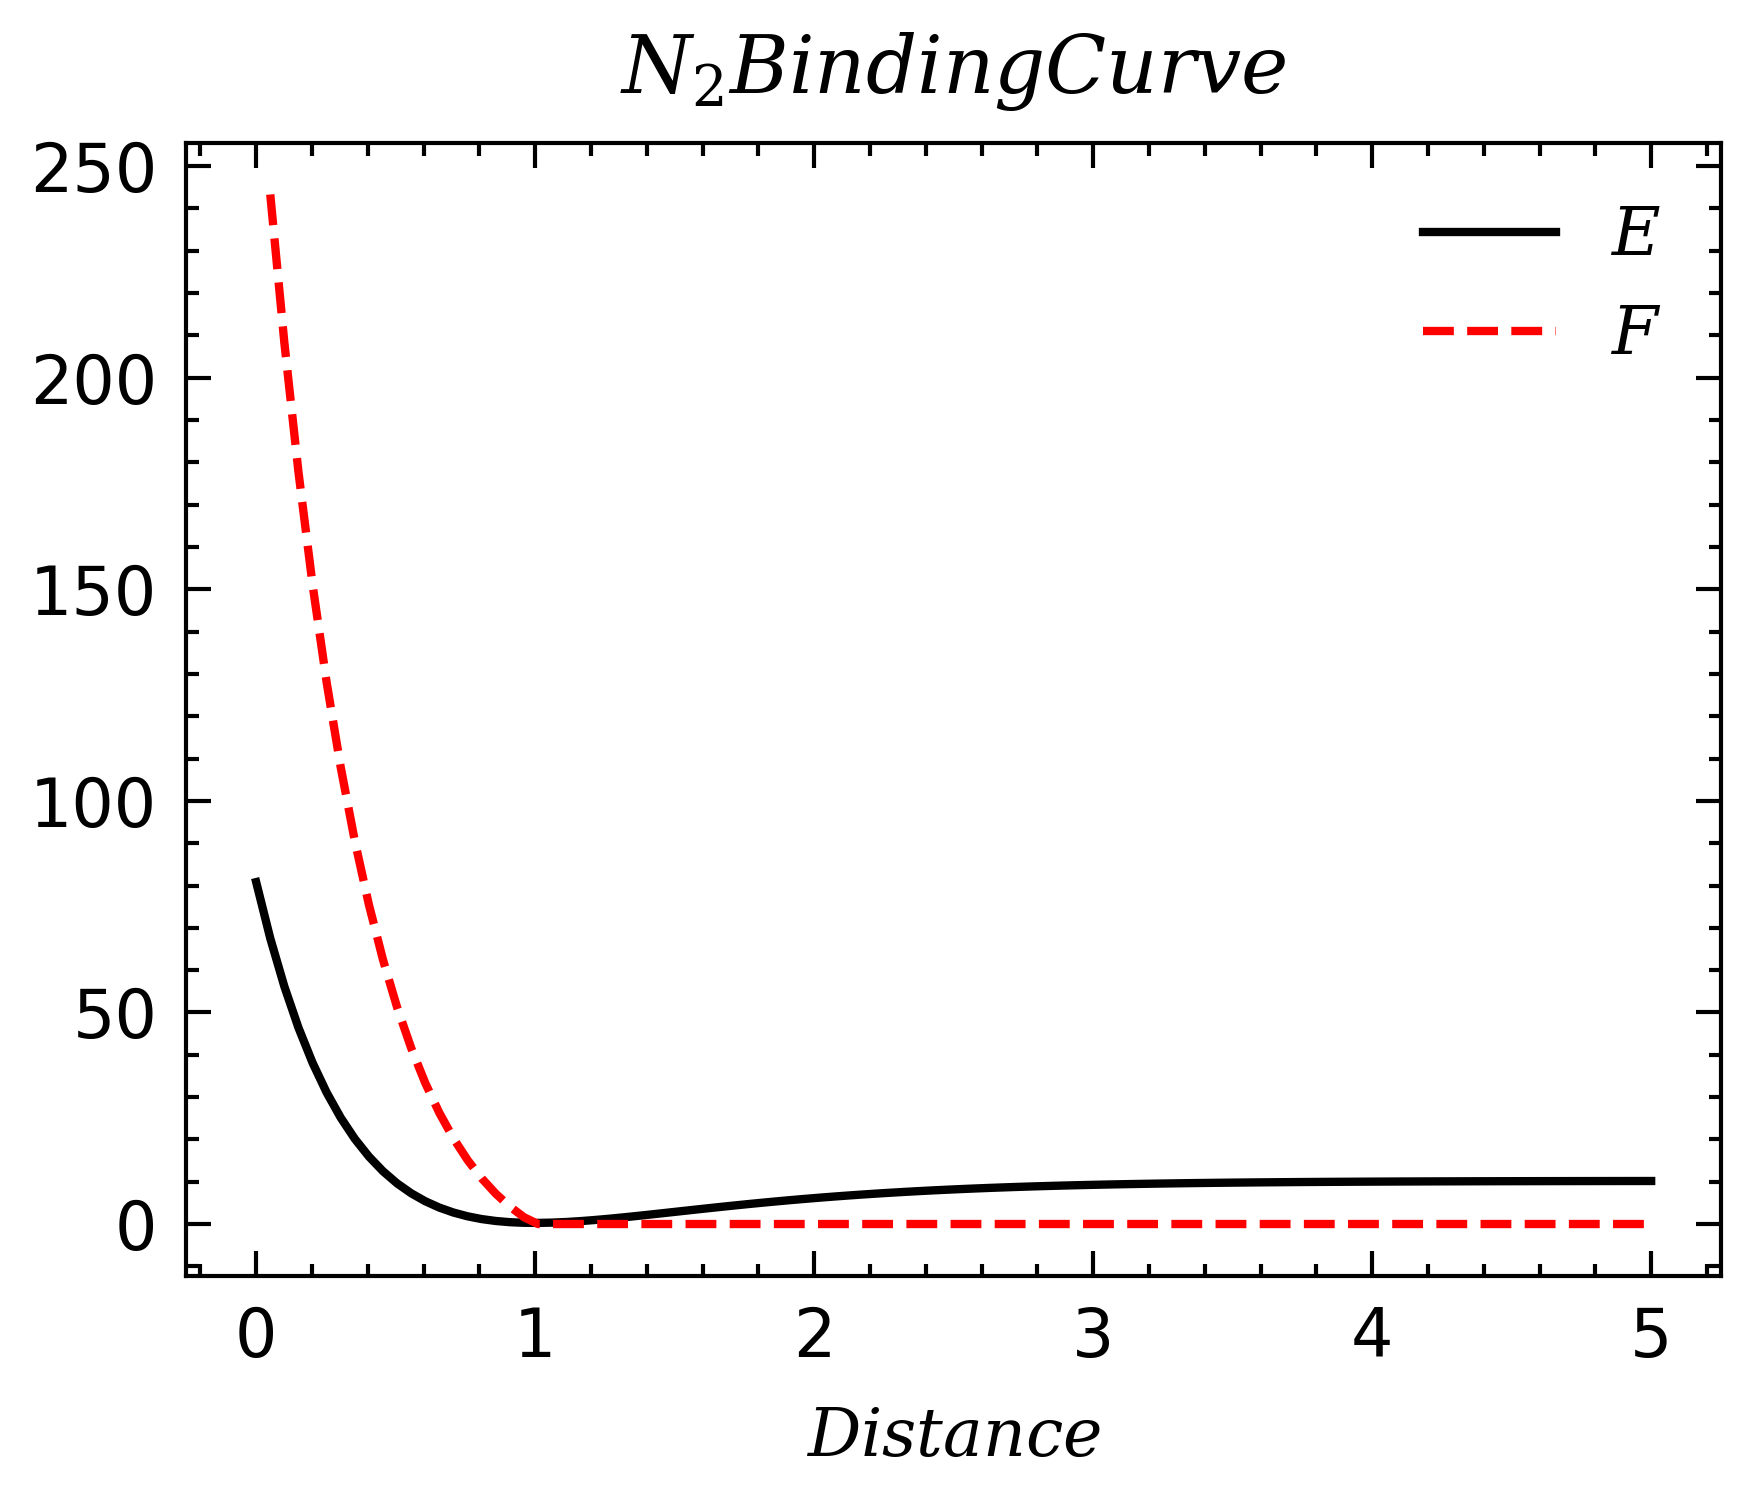

In [33]:
from ase.visualize import view
from ase import Atoms
from ase.io import write
from ase.calculators.emt import EMT
from ase.io import Trajectory
from ase.io import iread # reads multiple images, one at a time.
import numpy as np
from matplotlib import pyplot as plt

plt.style.use(['science', 'ieee', 'no-latex'])
N2 = Atoms('N2', positions=[[0, 0, -1], [0, 0, 1]])
#! ase uses calculators to perform calculations. Calculators are abstract interfaces to different backends which do the actual computation. Normally, calculators work by calling an external electronic structure code or force field code
N2.calc = EMT()
N2.center(vacuum=3.0)
traj = Trajectory('binding_curve.traj', 'w')
# view(N2, viewer='x3d')
energy = np.zeros(100)
forces = np.zeros(100)
count = 0
for d in np.linspace(-2, 3, 100):
    N2.positions[1, 2] = 5 + d
    energy[count] = N2.get_potential_energy()
    forces[count] = max(N2.get_forces()[1,:])
    traj.write(N2)
    count += 1
plt.figure()
plt.plot(2 + np.linspace(-2, 3, 100), energy)
plt.plot(2 + np.linspace(-2, 3, 100), forces)
plt.xlabel(r"$Distance$")
plt.title(r"$N_2BindingCurve$")
plt.legend([r"$E$",r"$F$"])

energies = []
distances = []
for atoms in iread('binding_curve.traj'):
    energies.append(atoms.get_potential_energy())
print(atoms.get_positions())